<a href="https://colab.research.google.com/github/mugao-s/adam-optimizer-lrs/blob/main/CNNLRs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras

In [3]:
#load the dataset

#train test split is 60000/10000
#the dataset contains 10 labels of fashion categories
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


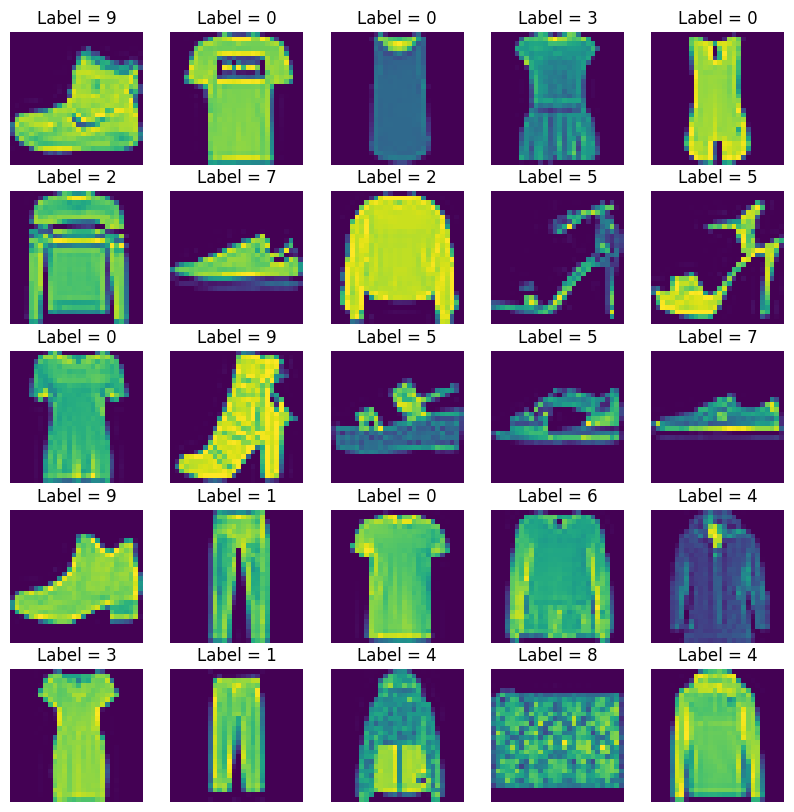

In [4]:
#plot some images
import matplotlib.pyplot as plt

f, ax = plt.subplots(5,5, figsize=(10,10))
ax = ax.flatten()
for i in range(25):
    ax[i].imshow(X_train[i])
    ax[i].set_title(f'Label = {y_train[i]}')
    ax[i].axis('off')

plt.show()

In [5]:
train_images = X_train
train_labels = y_train
test_images = X_test
test_labels = y_test

In [6]:
#normalize images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

#reshape images
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
from tensorflow.keras import layers, models, optimizers, losses

def create_cnn_model():
    Inp = layers.Input(shape=(28, 28, 1), dtype='float32')

    Conv1 = layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(Inp)
    MaxPool1 = layers.MaxPooling2D((2, 2))(Conv1)

    Conv2 = layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same')(MaxPool1)
    MaxPool2 = layers.MaxPooling2D((2, 2))(Conv2)

    Flat = layers.Flatten()(MaxPool2)
    Dense1 = layers.Dense(64, activation='relu')(Flat)
    Dense2 = layers.Dense(10, activation='softmax')(Dense1)

    model = models.Model(inputs=Inp, outputs=Dense2)
    return model


In [18]:
#define different learning rates and epochs
learning_rates = [0.0001, 0.001, 0.01]

models_dict = {}
history_list = []


#loop through learning rates, compile, and train models
for lr in learning_rates:
    model = create_cnn_model()
    model.compile(optimizer=optimizers.Adam(learning_rate=lr),
                  loss=losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    models_dict[f'LR_{lr}'] = model

    #train model and store history
    history = model.fit(X_train, y_train, epochs=10, validation_data=(test_images, test_labels))
    history_list.append(history)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.6956 - loss: 1.7486 - val_accuracy: 0.3006 - val_loss: 2.2859
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8612 - loss: 0.3990 - val_accuracy: 0.3347 - val_loss: 2.2779
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.8862 - loss: 0.3194 - val_accuracy: 0.3728 - val_loss: 2.2728
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8973 - loss: 0.2791 - val_accuracy: 0.3658 - val_loss: 2.2691
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9115 - loss: 0.2432 - val_accuracy: 0.3544 - val_loss: 2.2648
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9188 - loss: 0.2198 - val_accuracy: 0.3682 - val_loss: 2.2628
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9304 - loss: 0.1948 - val_accuracy: 0.3578 - val_loss: 2.2625
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9354 -

In [27]:
#final accuracy
for i, lr in enumerate(learning_rates):
    print(f"Learning Rate: {lr} - Final Training Accuracy: {history_list[i].history['accuracy'][-1]}")

Learning Rate: 0.0001 - Final Training Accuracy: 0.9425333142280579
Learning Rate: 0.001 - Final Training Accuracy: 0.9399833083152771
Learning Rate: 0.01 - Final Training Accuracy: 0.8329333066940308


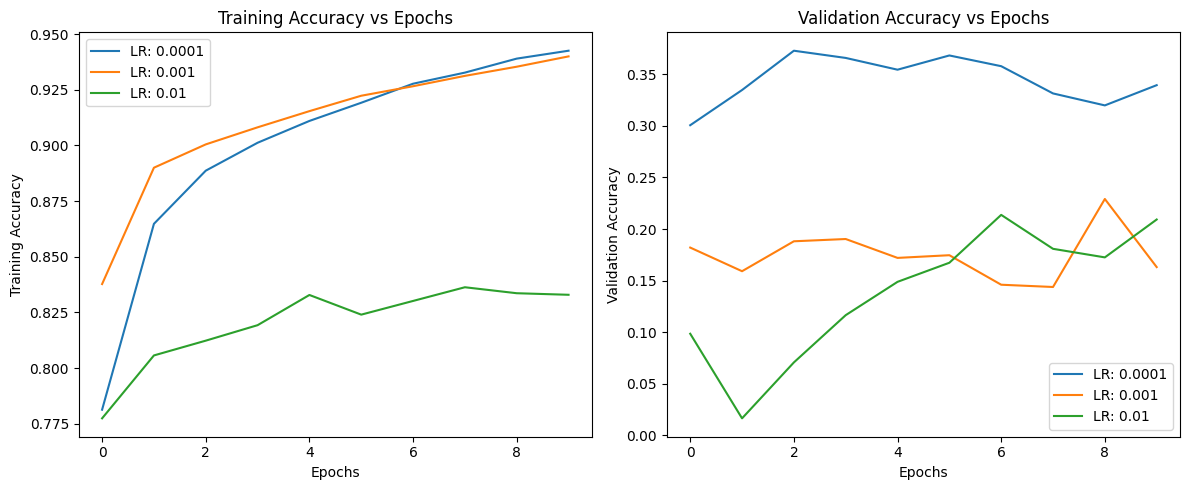

In [20]:
import matplotlib.pyplot as plt

#plot training accuracy and validation accuracy for each learning rate
plt.figure(figsize=(12, 5))

#training accuracy
plt.subplot(1, 2, 1)
for i, lr in enumerate(learning_rates):
    plt.plot(history_list[i].history['accuracy'], label=f'LR: {lr}')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs Epochs')
plt.legend()

#validation accuracy
plt.subplot(1, 2, 2)
for i, lr in enumerate(learning_rates):
    plt.plot(history_list[i].history['val_accuracy'], label=f'LR: {lr}')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()


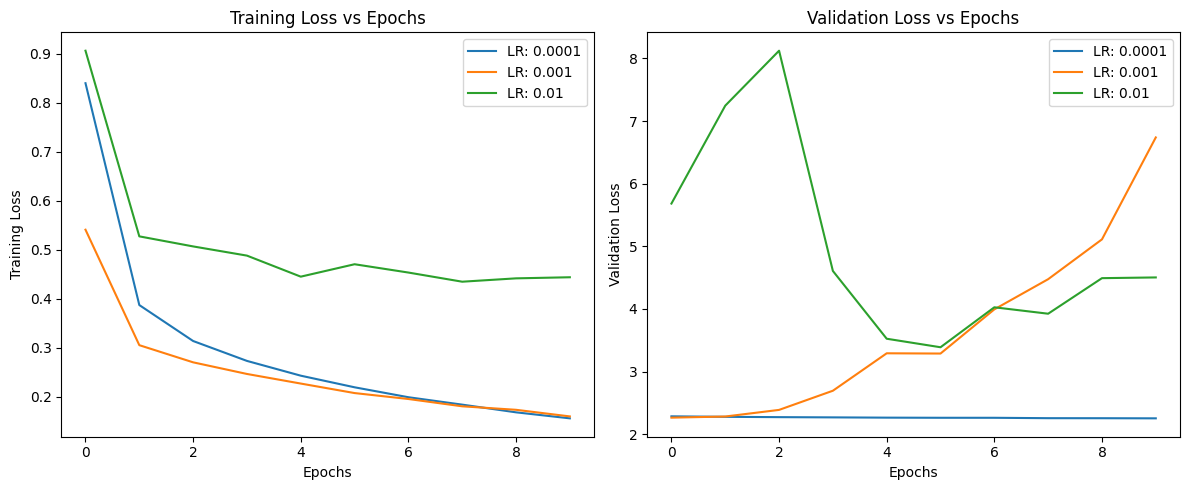

In [22]:
#plot loss curves for each learning rate
plt.figure(figsize=(12, 5))

#training loss
plt.subplot(1, 2, 1)
for i, lr in enumerate(learning_rates):
    plt.plot(history_list[i].history['loss'], label=f'LR: {lr}')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epochs')
plt.legend()

#validation loss
plt.subplot(1, 2, 2)
for i, lr in enumerate(learning_rates):
    plt.plot(history_list[i].history['val_loss'], label=f'LR: {lr}')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


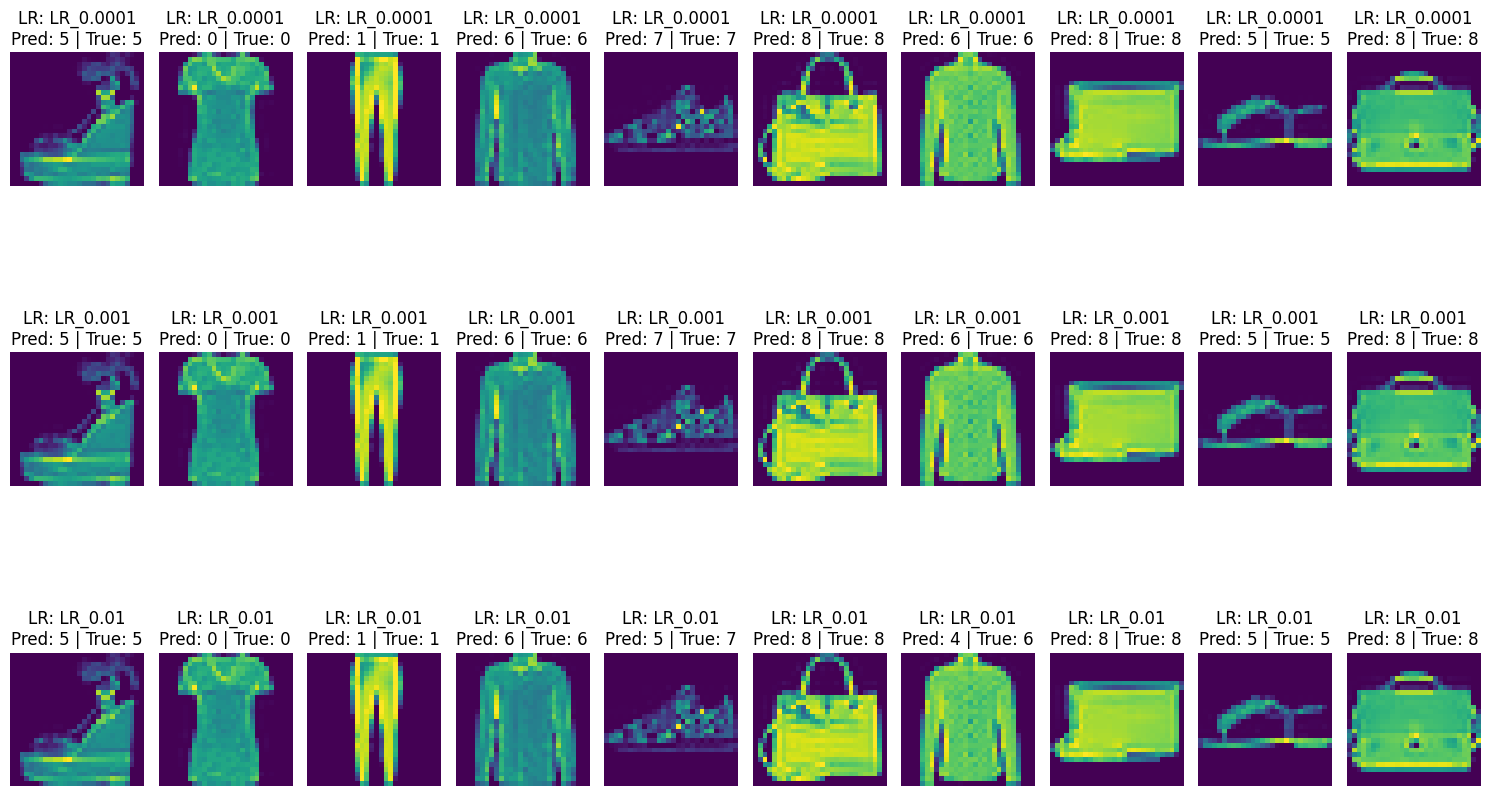

In [26]:
#randomly select test images
num_images = 10
img = np.random.choice(len(X_test), num_images, replace=False)
test_images_sample = X_test[img]
test_labels_sample = y_test[img]

plt.figure(figsize=(15, 10))

#loop through models trained with different LRs
for i, (lr, model) in enumerate(models_dict.items()):
    preds = model.predict(test_images_sample)
    preds_labels = np.argmax(preds, axis=1)

    for j in range(num_images):
        plt.subplot(len(learning_rates), num_images, i * num_images + j + 1)
        plt.imshow(test_images_sample[j].squeeze())
        plt.title(f"LR: {lr}\nPred: {preds_labels[j]} | True: {test_labels_sample[j]}")
        plt.axis('off')

plt.tight_layout()
plt.show()